In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None
import nltk

import numpy as np

In [2]:
songs = pd.read_csv(r'C:\\Users\\mendo\\Desktop\\songs_final.csv', sep=';',low_memory=False,  header=0, index_col=0, encoding='cp1252')
songs

,album_uri,album_name,album_img,album_release_date,album_release_year,album_popularity,track_name,track_uri,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity,artist
1,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Uncle Arthur,0uaMajzF1rrJObgvAKt4T2,0.6730,0.3500,...,0.620000,0.000000,0.0769,0.89400,100.873,132947,4,E major,26,David Bowie
2,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Sell Me A Coat,6hDUFB7tTdp1HzDmicxnP2,0.5800,0.2680,...,0.728000,0.000000,0.0908,0.53000,125.458,183040,4,G major,24,David Bowie
3,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Rubber Band,756SDD13DVEiDfXvO7jcgj,0.7130,0.3190,...,0.782000,0.000007,0.1150,0.44500,125.807,140333,4,B minor,25,David Bowie
4,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Love You Till Tuesday,5CoHsiMcgvCypwbplt60IT,0.5380,0.3410,...,0.696000,0.000003,0.0596,0.84300,148.998,193973,4,C major,26,David Bowie
5,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,There Is A Happy Land,1jDTWUTl4EiEflGdsrwDGE,0.5590,0.3290,...,0.621000,0.000000,0.0654,0.55500,98.445,196293,4,A minor,24,David Bowie
6,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,We Are Hungry Men,7ohMf0XGuut01DVv4WA92X,0.4050,0.3760,...,0.150000,0.000000,0.0923,0.77300,145.511,180640,4,D major,22,David Bowie
7,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,When I Live My Dream,5Nlgd6eceYRsLRwWsmpESA,0.4820,0.1980,...,0.659000,0.000000,0.1060,0.47100,91.431,206773,4,F major,23,David Bowie
8,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Little Bombardier,45SBKnVHfjRtOuKvgQBq3u,0.5870,0.3090,...,0.706000,0.000000,0.2250,0.59600,95.063,208120,1,G major,22,David Bowie
9,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Silly Boy Blue,2K9HVnIXP5OriqEWkzjEZb,0.3780,0.3030,...,0.685000,0.000028,0.1250,0.32000,100.526,234267,4,C# minor,22,David Bowie
10,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Come And Buy My Toys,3zj5ps7Zf8fwqHmHxNuhjz,0.6270,0.1880,...,0.842000,0.000002,0.1060,0.53900,106.177,130587,4,G major,21,David Bowie


In [3]:
lyrics = pd.read_csv(r'C:\\Users\\mendo\\Desktop\\lyrics_final.csv', sep='\t',low_memory=False,  header=0, index_col=0, encoding='cp1252')
lyrics.head(5)

,title,track_n,text,album,artist
1,London Calling,1,London calling to the faraway towns,London Calling,The Clash
2,London Calling,1,Now war is declared and battle come down,London Calling,The Clash
3,London Calling,1,London calling to the underworld,London Calling,The Clash
4,London Calling,1,"Come outta' the cupboard, ya' boys and girls",London Calling,The Clash
5,London Calling,1,"London calling, now don't look to us",London Calling,The Clash


In [4]:
songs.columns.values

array(['album_uri', 'album_name', 'album_img', 'album_release_date',
       'album_release_year', 'album_popularity', 'track_name', 'track_uri',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'key_mode', 'track_popularity',
       'artist'], dtype=object)

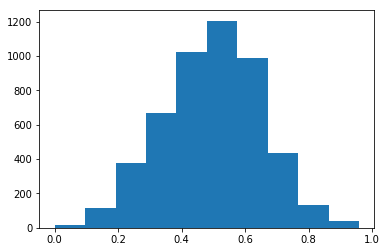

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(songs.danceability)
plt.show()

In [6]:
import re
lyrics = lyrics.sort_values(['album', 'title']).reset_index(drop=True).dropna()

t = []
for row in lyrics['title']:
    t.append((row.split(' (', 1)[0]).lower())
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append((row.split(' [', 1)[0]).lower())
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append((row.split(' -', 1)[0]).lower())
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\'', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub(',', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\&', 'and', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('in\'', 'ing', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('4', 'four', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('5', 'five', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('#!*@', 'fuck', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\?', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\.', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\&', 'and', row))
lyrics['title'] = t

t = []
for row in lyrics['album']:
    t.append((re.sub('\'', '', row)).lower())  
lyrics['album'] = t

t = []
for row in lyrics['album']:
    t.append((re.sub('\.', '', row)).lower())  
lyrics['album'] = t

t = []
for row in lyrics['album']:
    t.append((row.split(' -', 1)[0]).lower())  
lyrics['album'] = t

t = []
for row in lyrics['album']:
    t.append((row.split(' (', 1)[0]).lower())  
lyrics['album'] = t

t = []
for row in lyrics['text']:
    t.append((re.sub('\'', '', row)).lower())  
lyrics['text'] = t

t = []
for row in lyrics['text']:
    t.append((re.sub('/,', '', row)).lower())  
lyrics['text'] = t

t = []
for row in lyrics['text']:
    t.append((re.sub('{intro}', '', row)).lower())  
lyrics['text'] = t

t = []
for row in lyrics['text']:
    t.append((re.sub('(intro)', '', row)).lower())  
lyrics['text'] = t

lyrics = lyrics.drop_duplicates()
lyrics['ID'] = lyrics['album'] + ' - ' + lyrics['title']

lyrics = lyrics.groupby(['title','track_n', 'album', 'artist', 'ID'])['text'].apply(lambda x: ','.join(x)).reset_index().sort_values(['album', 'track_n']).drop_duplicates(['artist', 'title'])

In [7]:
cover_dict = {'a sailors guide to earth - in bloom':1, 'axis: bold as love - shes so fine':1,
              'electric ladyland - come on':1, 'electric ladyland - all along the watchtower':1,
             'high top mountain - poor rambler':1, 'high top mountain - id have to be crazy':1,
             'london calling - brand new cadillac':1, 'london calling - the guns of brixton':1,
             'london calling - wrong em boyo':1, 'london calling - revolution rock':1,
             'metamodern sounds in country music - the promise':1, 'pink flag - different to me':1,
             'ramones - lets dance':1, 'road to ruin - needles and pins':1,
             'rocket to russia - do you wanna dance':1, 'rocket to russia - surfin bird':1,
             'sandinista! - junco partner':1, 'sandinista! - look here':1,
             'station to station - wild is the wind':1, 'the clash - police and thieves':1,
             'the late great townes van zandt - fraulein':1, 'the silver tongued devil and i - good christian soldier':1,
             'young americans - across the universe':1, 'jesus was a capricorn - jesus was a capricorn':1}
lyrics['cover'] = lyrics['ID'].map(cover_dict).fillna(0)
lyrics = lyrics[lyrics['cover'] != 1].reset_index(drop=True)

In [8]:
songs = songs.sort_values(['album_name', 'track_name']).reset_index(drop=True)

t = []
for row in songs['track_name']:
    t.append((row.split(' (', 1)[0]).lower())
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append((row.split(' [', 1)[0]).lower())
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append((row.split(' -', 1)[0]).lower())
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\'', '', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\&', 'and', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub(',', '', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\&', 'and', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('in\'', 'ing', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('4', 'four', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('5', 'five', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('#!*@', 'fuck', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\?', '', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\.', '', row))
songs['track_name'] = t

t = []
for row in songs['album_name']:
    t.append((re.sub('\'', '', row)).lower())  
songs['album_name'] = t

t = []
for row in songs['album_name']:
    t.append((re.sub(' the remaster', '', row)).lower())  
songs['album_name'] = t

t = []
for row in songs['album_name']:
    t.append((re.sub('\.', '', row)).lower())  
songs['album_name'] = t

t = []
for row in songs['album_name']:
    t.append((row.split(' -', 1)[0]).lower())  
songs['album_name'] = t

t = []
for row in songs['album_name']:
    t.append((row.split(' (', 1)[0]).lower())  
songs['album_name'] = t

songs = songs.drop_duplicates()
songs['ID'] = songs['album_name'] + ' - ' + songs['track_name']

In [9]:
match_up = lyrics.merge(songs, how='left', on='ID').drop_duplicates(['artist_x', 'text'])
match_up = match_up.dropna()

In [10]:
#match_up.to_csv('C:\\Users\\mendo\\Desktop\\match_up_final.csv')

In [11]:
match_up.columns.values

array(['title', 'track_n', 'album', 'artist_x', 'ID', 'text', 'cover',
       'album_uri', 'album_name', 'album_img', 'album_release_date',
       'album_release_year', 'album_popularity', 'track_name', 'track_uri',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'key_mode', 'track_popularity',
       'artist_y'], dtype=object)

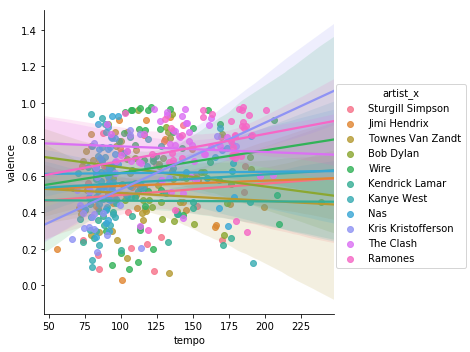

In [12]:
sns.lmplot(data=match_up, x='tempo', y='valence', hue='artist_x')
plt.show()

In [13]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.tfidfmodel import TfidfModel
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.corpora.dictionary import Dictionary

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(['yeah', 'ya', 'no', 'woah', 'ooh'])

C:\Users\mendo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [14]:
lyrics = lyrics[lyrics['text'] != '(instrumental)']

In [15]:
#VERSION 1

y = lyrics['artist']

X_train, X_test, y_train, y_test = train_test_split(lyrics['text'], y, test_size=0.4, random_state=13, stratify=y)

text_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)),
                     ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                               alpha=1e-3, n_iter=5, random_state=13))])

text_clf.fit(X_train, y_train)
pred = text_clf.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
score

C:\Users\mendo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.68306010928961747

In [16]:
test1 = pd.DataFrame(y_test).reset_index()
test2 = pd.DataFrame(X_test).reset_index()

rig = test1.merge(test2, how='inner', on='index')
rig['pred'] = pred

a = []
for index, row in rig.iterrows():
    if row['artist'] == row['pred']:
        a.append(1)
    else:
        a.append(0)
        
rig['pred_binary'] = a
rig['count'] = 1

misses = rig[rig['pred_binary']==0]

In [17]:
rig = lyrics.merge(rig, how='inner', on='text')
rig = rig[['album', 'track_n', 'title', 'text', 'artist_x', 'pred', 'count']].sort_values(['artist_x', 'album', 'track_n'])
rig.columns = ['album', 'track_n', 'song_title', 'text', 'artist', 'predicted_artist', 'count']
rig

,album,track_n,song_title,text,artist,predicted_artist,count
11,blonde on blonde,3,visions of johanna,aint it just like the night to play tricks whe...,Bob Dylan,Bob Dylan,1
12,blonde on blonde,6,stuck inside of mobile with the memphis blues ...,"(),oh, the ragman draws circles,up and down th...",Bob Dylan,Sturgill Simpson,1
13,blonde on blonde,10,temporary like achilles,"standing on your window, honey,yes, ive been h...",Bob Dylan,Bob Dylan,1
14,blonde on blonde,11,absolutely sweet marie,"well, your railroad gate, you know i just cant...",Bob Dylan,Jimi Hendrix,1
15,blonde on blonde,12,fourth time around,"when she said,“dont waste your words, theyre j...",Bob Dylan,Bob Dylan,1
16,blonde on blonde,14,sad-eyed lady of the lowlands,with your mercury mouth in the missionary time...,Bob Dylan,Bob Dylan,1
17,blood on the tracks,1,tangled up in blue,"early one morning the sun was shining,i was la...",Bob Dylan,Bob Dylan,1
18,blood on the tracks,3,youre a big girl now,"our conversation was short and sweet,it nearly...",Bob Dylan,Ramones,1
19,blood on the tracks,7,lily rosemary and the jack of hearts,"the festival was over, and the boys were all p...",Bob Dylan,Townes Van Zandt,1
20,blood on the tracks,9,shelter from the storm,"twas in another lifetime,one of toil and blood...",Bob Dylan,Bob Dylan,1


In [18]:
info = rig[['artist', 'predicted_artist', 'count']]
info = pd.pivot_table(info, values='count', index='artist', columns=['predicted_artist'], aggfunc=np.sum, fill_value=0)
info

predicted_artist,Bob Dylan,Jimi Hendrix,Kanye West,Kendrick Lamar,Kris Kristofferson,Nas,Ramones,Sturgill Simpson,The Clash,Townes Van Zandt,Wire
artist,,,,,,,,,,,
Bob Dylan,8,1,0,0,0,0,3,1,0,1,0
Jimi Hendrix,0,7,1,1,1,0,2,0,1,1,0
Kanye West,0,0,18,1,0,0,2,0,0,1,1
Kendrick Lamar,0,0,0,16,0,2,0,0,1,0,0
Kris Kristofferson,0,0,0,0,12,0,0,0,0,0,0
Nas,0,0,0,1,0,15,0,0,0,0,1
Ramones,1,1,0,0,0,0,9,0,3,0,4
Sturgill Simpson,0,2,0,0,1,0,2,6,0,0,0
The Clash,1,0,0,0,1,0,0,0,20,0,4


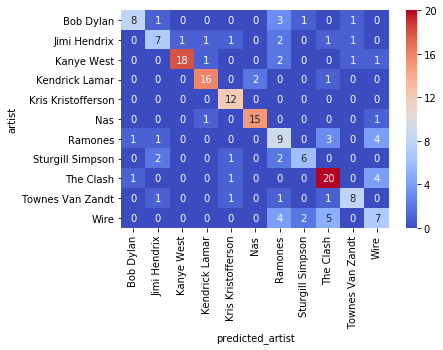

In [19]:
sns.heatmap(info, cmap='coolwarm', annot=True)
plt.show()

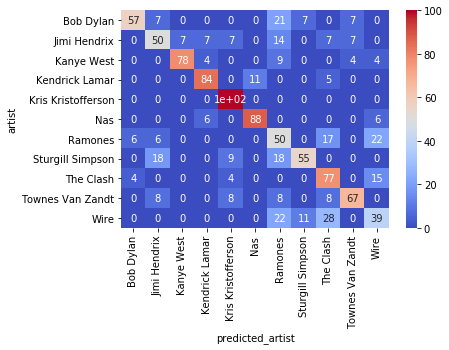

In [20]:
info_alt = info.T
artists = list(info_alt.columns.values)

for artist in artists:
    info_alt[artist] = round((info_alt[artist] / info_alt[artist].sum())*100, 0)
info_alt = info_alt.T

sns.heatmap(info_alt, cmap='coolwarm', annot=True)
plt.show()

In [21]:
docs = list(match_up['text'])
tokenized_docs = [word_tokenize(doc.lower()) for doc in docs]
dictionary = Dictionary(tokenized_docs)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [22]:
docs = list(lyrics['text'])
tokenized_docs = [word_tokenize(doc.lower()) for doc in docs]
dictionary = Dictionary(tokenized_docs)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
doc = corpus[0]

tfidf = TfidfModel(corpus)

tfidf_weights = tfidf[doc]
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
for term_id, weight in sorted_tfidf_weights[:20]:
    print(dictionary.get(term_id), weight)

cry 0.402897139932
greatest 0.253916949758
known 0.241738283959
hearing 0.234986091182
fisherman 0.172234188877
how 0.163112534184
makes 0.161158855973
wish 0.159035480746
earth 0.155015001807
ever 0.152331834141
ive 0.143778276702
grandfather 0.133235811539
treasure 0.126958474879
measure 0.121829517373
hello 0.117493045591
always 0.116016624469
breaks 0.11373662287
everyday 0.11373662287
loves 0.11373662287
could 0.111271301754


In [23]:
#nltk.download('wordnet')

In [24]:
tokens = [w for w in word_tokenize(lyrics['text'][0].lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stopwords.words('english')]

Counter(no_stops).most_common(5)

lemm = WordNetLemmatizer()

In [25]:
for song in range(0,len(lyrics['title'])):
    tokens = [w for w in word_tokenize(lyrics['text'][song].lower()) if w.isalpha()]
    no_stops = [t for t in tokens if t not in stopwords.words('english')]
    lemmatized = [lemm.lemmatize(t) for t in no_stops]
    count = Counter(lemmatized).most_common(5)
    corpus = Counter(lemmatized)
    print(lyrics['title'][song] + ': ' + str(count))

welcome to earth: [('cry', 5), ('love', 4), ('could', 3), ('know', 3), ('ive', 3)]
breakers roar: [('oh', 4), ('dream', 4), ('keep', 2), ('love', 2), ('seems', 2)]
keep it between the lines: [('dont', 10), ('keep', 4), ('stay', 4), ('stuff', 4), ('get', 3)]
sea stories: [('get', 5), ('like', 4), ('running', 3), ('high', 3), ('got', 3)]
brace for impact: [('go', 4), ('live', 3), ('little', 3), ('one', 2), ('must', 2)]
all around you: [('around', 3), ('like', 2), ('go', 2), ('cause', 2), ('heart', 2)]
oh sarah: [('go', 4), ('im', 4), ('old', 3), ('ill', 3), ('away', 3)]
call to arms: [('well', 4), ('bullshit', 3), ('tell', 2), ('keep', 2), ('send', 2)]
foxy lady: [('foxy', 4), ('get', 3), ('yeah', 3), ('know', 2), ('youre', 2)]
manic depression: [('caress', 4), ('manic', 3), ('depression', 3), ('go', 3), ('sweet', 3)]
red house: [('yonder', 5), ('baby', 5), ('lord', 4), ('thats', 3), ('somethings', 3)]
can you see me: [('see', 8), ('hear', 5), ('yeah', 4), ('baby', 4), ('dont', 3)]
love 

crosstown traffic: [('traffic', 3), ('see', 3), ('dont', 2), ('crosstown', 2), ('get', 2)]
voodoo chile: [('well', 9), ('im', 5), ('voodoo', 4), ('chile', 4), ('lord', 4)]
little miss strange: [('little', 3), ('miss', 3), ('strange', 3), ('know', 2), ('came', 2)]
long hot summer night: [('rescue', 16), ('yeah', 8), ('long', 6), ('baby', 6), ('im', 6)]
gypsy eyes: [('love', 7), ('ive', 4), ('gypsy', 4), ('eye', 3), ('hey', 3)]
burning of the midnight lamp: [('burn', 3), ('lonely', 3), ('loneliness', 2), ('enough', 2), ('make', 2)]
rainy day dream away: [('day', 6), ('groove', 5), ('rainy', 5), ('see', 4), ('back', 4)]
1983: [('well', 4), ('last', 3), ('u', 3), ('thats', 3), ('yeah', 3)]
still raining still dreaming: [('lay', 8), ('back', 8), ('day', 5), ('rainy', 4), ('groove', 4)]
house burning down: [('hey', 4), ('burn', 3), ('ooh', 3), ('sky', 2), ('red', 2)]
voodoo child: [('voodoo', 6), ('child', 6), ('im', 5), ('one', 4), ('dont', 4)]
sherane aka master splinters daughter: [('damn

affirmative action: [('nigga', 14), ('got', 10), ('firm', 6), ('yo', 4), ('like', 4)]
the set up: [('nigga', 10), ('got', 9), ('shit', 6), ('back', 6), ('get', 5)]
black girl lost: [('nigga', 9), ('get', 5), ('hit', 4), ('way', 4), ('getting', 4)]
suspect: [('nigga', 7), ('suspect', 5), ('dont', 5), ('shit', 4), ('witness', 4)]
shootouts: [('nigga', 8), ('back', 5), ('let', 5), ('yo', 4), ('got', 4)]
live nigga rap: [('nigga', 17), ('got', 5), ('like', 5), ('back', 4), ('shit', 4)]
if i ruled the world: [('ruled', 12), ('love', 11), ('em', 11), ('imagine', 7), ('world', 7)]
silent murder: [('nigga', 13), ('murder', 4), ('like', 4), ('silent', 3), ('one', 3)]
nobody wins: [('weve', 2), ('long', 2), ('try', 2), ('make', 2), ('far', 2)]
it sure was: [('say', 3), ('wont', 3), ('said', 2), ('sure', 2), ('lasted', 2)]
sugar man: [('baby', 4), ('sugar', 3), ('man', 3), ('well', 3), ('gon', 2)]
help me: [('help', 6), ('thought', 4), ('lord', 3), ('im', 3), ('smile', 3)]
jesse younger: [('jesse

KeyError: 275